# How do you implement a rule-based questioner?
Many top rankers develop a hybrid rule-based/LLM questioner. How do you implement rule-based algorithms? Do you use multiple "if"? Are there any other useful libraries?  
I've implemented a rule-based questioner without using multiple "if" statements. If there is any other easy way please share in comment!

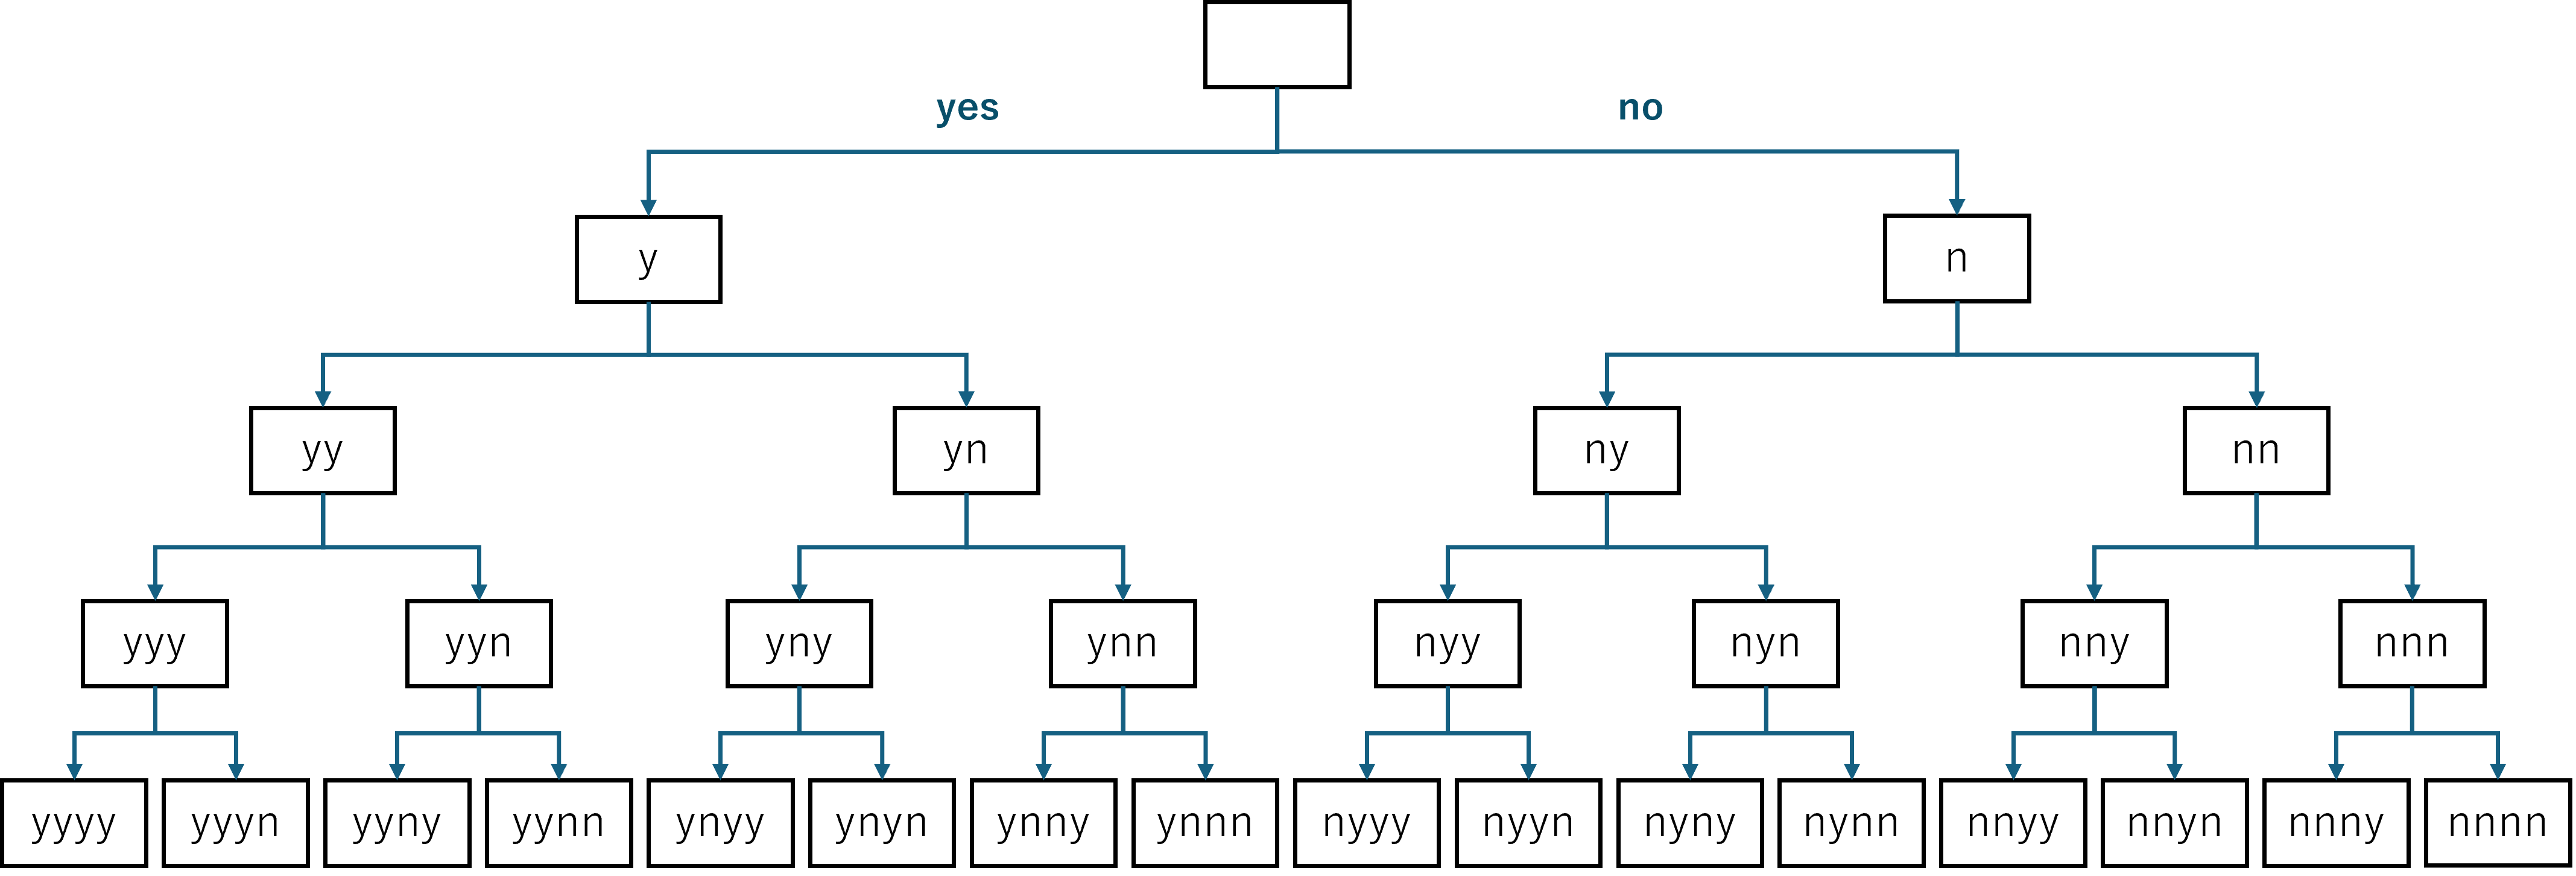

In [ ]:
%%bash
mkdir -p /kaggle/working/submission

In [ ]:
%%writefile -a submission/main.py

import random

class Robot:
    def __init__(self):
        pass
    
    def on(self, mode, obs):
        assert mode in ["asking", "guessing", "answering"], "mode can only take one of these values: asking, answering, guessing"
        if mode == "asking":
            tree_dic = {
                "1": {
                    "": "Is it a place?",
                },
                "2": {
                    "y": "Is it a country?",
                    "n": "Is it a food?",
                },
                "3": {
                    "yy":"Is it located ou Europe?",
                    "yn":"Is it a city?",
                    "ny":"Is that food sweet?",
                    "nn":"Is it a drink?",
                },
                "4": {
                    "yyy":"Does the keyword begins with the letter 'a'?",
                    "yyn":"Does the keyword begins with the letter 'a'?",
                    "yny":"Does the keyword begins with the letter 'a'?",
                    "ynn":"Does the keyword begins with the letter 'a'?",
                    "nyy":"Does the keyword begins with the letter 'a'?",
                    "nyn":"Does the keyword begins with the letter 'a'?",
                    "nny":"Does the keyword begins with the letter 'a'?",
                    "nnn":"Does the keyword begins with the letter 'a'?",
                },
                "5": {
                    "yyyy":"",
                    "yyyn":"Does the keyword begins with the letter 'b'?",
                    "yyny":"",
                    "yynn":"Does the keyword begins with the letter 'b'?",
                    "ynyy":"",
                    "ynyn":"Does the keyword begins with the letter 'b'?",
                    "ynny":"",
                    "ynnn":"Does the keyword begins with the letter 'b'?",
                    "nyyy":"",
                    "nyyn":"Does the keyword begins with the letter 'b'?",
                    "nyny":"",
                    "nynn":"Does the keyword begins with the letter 'b'?",
                    "nnyy":"",
                    "nnyn":"Does the keyword begins with the letter 'b'?",
                    "nnny":"",
                    "nnnn":"Does the keyword begins with the letter 'b'?",
                }
            }
            answers_hist = ""
            for answer in obs.answers:
                answers_hist += answer[0]
                
            if len(obs.answers)<len(tree_dic):
                output = tree_dic[str(len(obs.answers)+1)][answers_hist]
                if output=="":
                    output = "Call your LLM agent"
            else:
                output = "Call your LLM agent"
        if mode == "answering":
            output = random.choice(['yes', 'no'])
        if mode == "guessing":
            output = 'apple'
        return output

robot = Robot()
    
def agent(obs, cfg):
    
    if obs.turnType =="ask":
        response = robot.on(mode = "asking", obs = obs)
    elif obs.turnType =="guess":
        response = robot.on(mode = "guessing", obs = obs)
    elif obs.turnType =="answer":
        response = robot.on(mode = "answering", obs = obs)
        
    return response

In [ ]:
%%time

from kaggle_environments import make
agent = "/kaggle/working/submission/main.py"
env = make("llm_20_questions", debug=True)
game_output = env.run(agents=[agent, agent, agent, agent])
env.render(mode="ipython", width=600, height=500)